## REG.NO: 212224060031
## NAME  : V.ATCHAYA


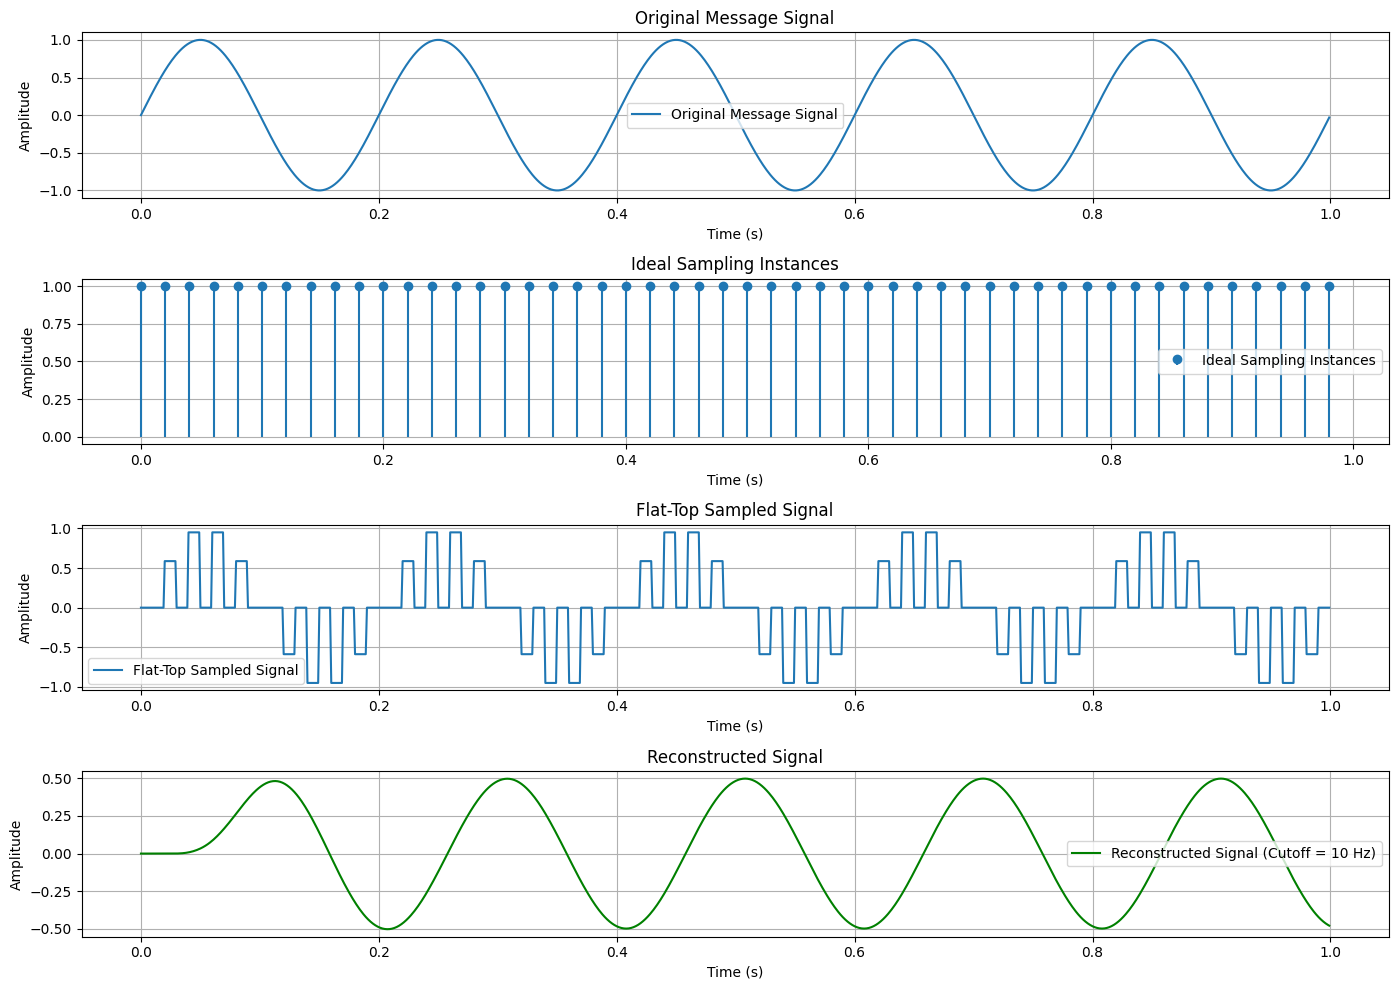

In [1]:
# Flat-Top Sampling Simulation

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Sampling parameters
fs = 1000          # Sampling frequency (Hz)
T = 1              # Duration (seconds)
t = np.arange(0, T, 1/fs)

# Message signal
fm = 5             # Message frequency (Hz)
message_signal = np.sin(2 * np.pi * fm * t)

# Pulse train parameters
pulse_rate = 50    # Pulses per second
pulse_train_indices = np.arange(0, len(t), int(fs / pulse_rate))

pulse_train = np.zeros_like(t)
pulse_train[pulse_train_indices] = 1

# Flat-top sampling
flat_top_signal = np.zeros_like(t)
sample_times = t[pulse_train_indices]
pulse_width_samples = int(fs / (2 * pulse_rate))  # Pulse width

for sample_time in sample_times:
    index = np.argmin(np.abs(t - sample_time))
    if index < len(message_signal):
        sample_value = message_signal[index]
        start_index = index
        end_index = min(index + pulse_width_samples, len(t))
        flat_top_signal[start_index:end_index] = sample_value

# Low-pass filter function
def lowpass_filter(signal, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return lfilter(b, a, signal)

# Reconstruction
cutoff_freq = 2 * fm
reconstructed_signal = lowpass_filter(flat_top_signal, cutoff_freq, fs)

# Plotting
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(t, message_signal, label='Original Message Signal')
plt.title('Original Message Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 2)
plt.stem(t[pulse_train_indices], pulse_train[pulse_train_indices],
         basefmt=" ", label='Ideal Sampling Instances')
plt.title('Ideal Sampling Instances')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(t, flat_top_signal, label='Flat-Top Sampled Signal')
plt.title('Flat-Top Sampled Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(t, reconstructed_signal, color='green',
         label=f'Reconstructed Signal (Cutoff = {cutoff_freq} Hz)')
plt.title('Reconstructed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()